In [1]:
import pandas as pd # Also help in creating the dummy variables , to conncatenate the columns.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
tr= pd.read_csv('promotion_tr.csv')
ts= pd.read_csv('promotion_ts.csv')

In [3]:
tr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
tr.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

# **Dummy Variables**

In [6]:
cat_feats = ['department','gender']
tr =pd.get_dummies(tr, columns=cat_feats, drop_first=True)
ts =pd.get_dummies(ts, columns=cat_feats, drop_first=True)

In [7]:
'''
tr['department']=tr.department.map({'Sales & Marketing':1, 'Operations':2, 'Technology':3, 'Analytics':4,
       'R&D':5, 'Procurement':6, 'Finance':7, 'HR':8, 'Legal':9})
tr['gender']=tr.gender.map({'f':0,'m':1})
'''
'''
ts['department']=ts.department.map({'Sales & Marketing':1, 'Operations':2, 'Technology':3, 'Analytics':4,
       'R&D':5, 'Procurement':6, 'Finance':7, 'HR':8, 'Legal':9})
ts['gender']=ts.gender.map({'f':0,'m':1})
'''

"\nts['department']=ts.department.map({'Sales & Marketing':1, 'Operations':2, 'Technology':3, 'Analytics':4,\n       'R&D':5, 'Procurement':6, 'Finance':7, 'HR':8, 'Legal':9})\nts['gender']=ts.gender.map({'f':0,'m':1})\n"

In [8]:
tr=tr.astype({'department_Finance': 'int64' ,'department_HR':'int64','department_Legal':'int64','department_Operations':'int64','department_Procurement':'int64','department_R&D':'int64','department_Sales & Marketing':'int64',
              'department_Technology':'int64','gender_m':'int64'})

ts=ts.astype({'department_Finance': 'int64' ,'department_HR':'int64','department_Legal':'int64','department_Operations':'int64','department_Procurement':'int64','department_R&D':'int64','department_Sales & Marketing':'int64',
              'department_Technology':'int64','gender_m':'int64'})

In [9]:
tr['education']=tr['education'].isnull().max()
tr['previous_year_rating']=tr['previous_year_rating'].isnull().median()
ts['education']=ts['education'].isnull().max()
ts['previous_year_rating']=ts['previous_year_rating'].isnull().median()

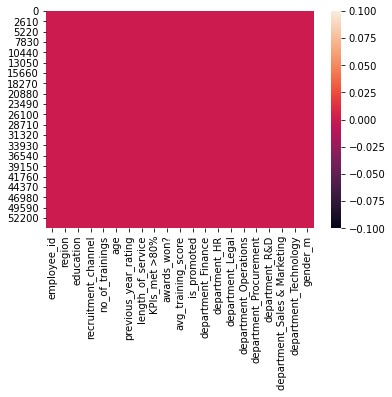

In [10]:
sns.heatmap(tr.isnull())

# **Logistic Regression**

In [11]:
#Splitting
X_train=tr.drop(['is_promoted','region','recruitment_channel'], axis=1)
y_train=tr['is_promoted']

X_test=ts.drop(['region','recruitment_channel'], axis=1)

#Linear Regression
glm= LogisticRegression()
#Model
glm.fit(X_train, y_train)
#Prediction
predictions = glm.predict(X_train)

In [12]:
accuracy_score(y_train,predictions)

0.9148299518318493

# **Decision Tree**

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
predictions = dtree.predict(X_train)

In [15]:
accuracy_score(y_train,predictions)

0.9283133849073129

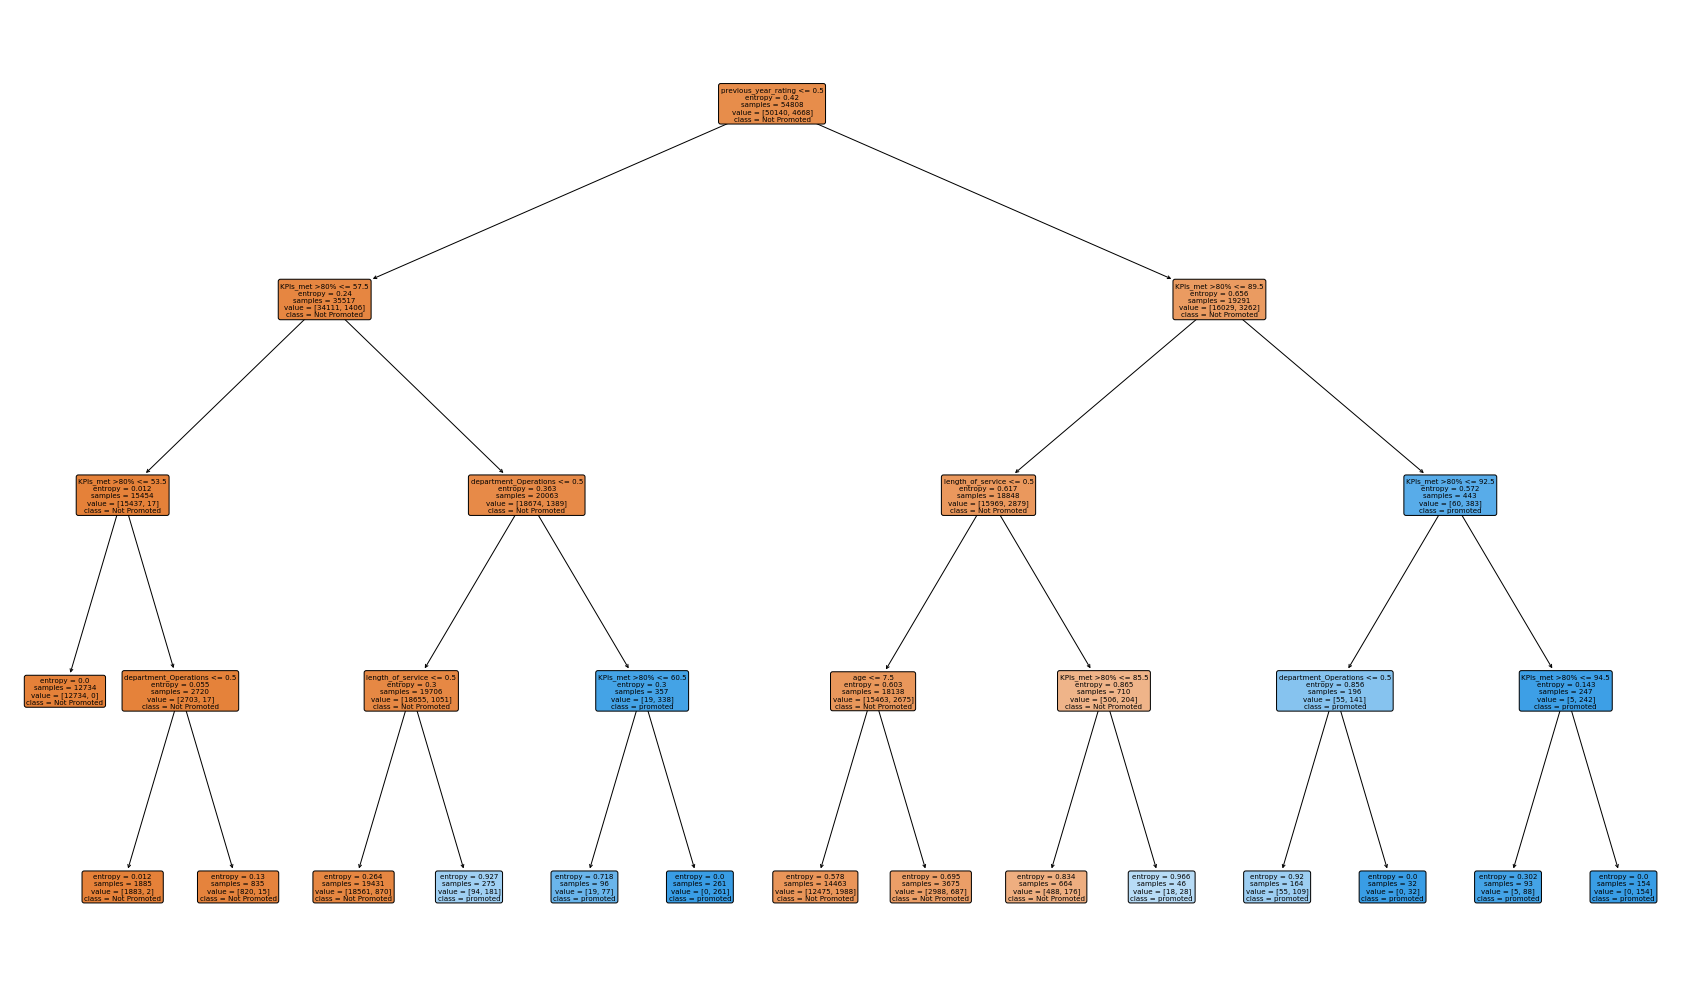

In [16]:
# tree diagram
plt.figure(figsize=(30,18))
from sklearn.tree import plot_tree 
plot_tree(dtree, feature_names=tr.columns, class_names=({1:'promoted',0:'Not Promoted'}),filled = True, rounded = True)
plt.savefig('tree_visualization.png') 

In [32]:
ts_predictions=dtree.predict(X_test)

In [33]:
np.count_nonzero(ts_predictions)

461

In [34]:
csv = pd.DataFrame(ts_predictions, columns=['is_promoted'])

csv.to_csv("ts_predictions.csv", index=False)

In [35]:
ts_predictions1=pd.read_csv('ts_predictions.csv')